In [38]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
len(x_train)

60000

In [5]:
len(x_test)

10000

In [7]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

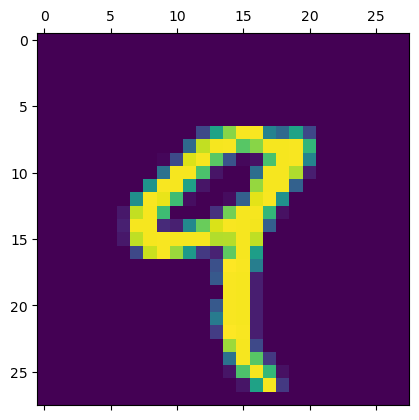

In [12]:
plt.matshow(x_train[4])

In [14]:
y_test[4]

4

In [16]:
x_train = x_train/255
x_test = x_test/255

In [18]:
x_train_flattened = x_train.reshape(len(x_train),28*28)
x_test_flattened = x_test.reshape(len(x_test),28*28)

In [40]:
x_train_flattened.shape

(60000, 784)

In [42]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),activation= 'sigmoid')
])
model.compile(optimizer = 'adam', 
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model.fit(x_train_flattened, y_train, epochs= 5)

Epoch 1/5


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 211us/step - accuracy: 0.8155 - loss: 0.7156
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 208us/step - accuracy: 0.9148 - loss: 0.3033
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 208us/step - accuracy: 0.9195 - loss: 0.2857
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 207us/step - accuracy: 0.9236 - loss: 0.2756
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 207us/step - accuracy: 0.9263 - loss: 0.2665


In [23]:
model.evaluate(x_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 186us/step - accuracy: 0.9150 - loss: 0.3021


[0.26698440313339233, 0.9254000186920166]

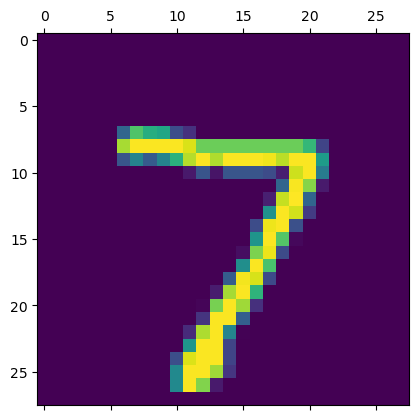

In [26]:
plt.matshow(x_test[0])

In [28]:
y_predicted = model.predict(x_test_flattened)
y_predicted[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 200us/step


array([2.0123597e-02, 3.4405059e-07, 4.9997896e-02, 9.5512038e-01,
       2.8204315e-03, 1.1900426e-01, 1.2303150e-06, 9.9975407e-01,
       1.0310475e-01, 6.7276865e-01], dtype=float32)

In [30]:
np.argmax(y_predicted[0])

7

In [32]:
y_predicted_labels =[np.argmax(i)for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [44]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 956,    0,    2,    2,    0,    7,    7,    3,    3,    0],
       [   0, 1113,    3,    2,    0,    1,    4,    2,   10,    0],
       [   3,    9,  917,   20,    8,    3,   10,   10,   49,    3],
       [   1,    0,   18,  927,    0,   18,    2,   12,   25,    7],
       [   1,    1,    2,    2,  914,    0,   12,    5,   10,   35],
       [   7,    3,    2,   40,   11,  765,   15,    7,   36,    6],
       [  10,    3,    8,    1,    7,   12,  912,    2,    3,    0],
       [   1,    6,   20,    8,    7,    0,    0,  954,    3,   29],
       [   4,    7,    6,   18,    9,   19,    9,   11,  884,    7],
       [   8,    7,    2,   10,   29,    6,    0,   26,    9,  912]],
      dtype=int32)>

Text(0.5, 1.0, 'Confusion Matrix')

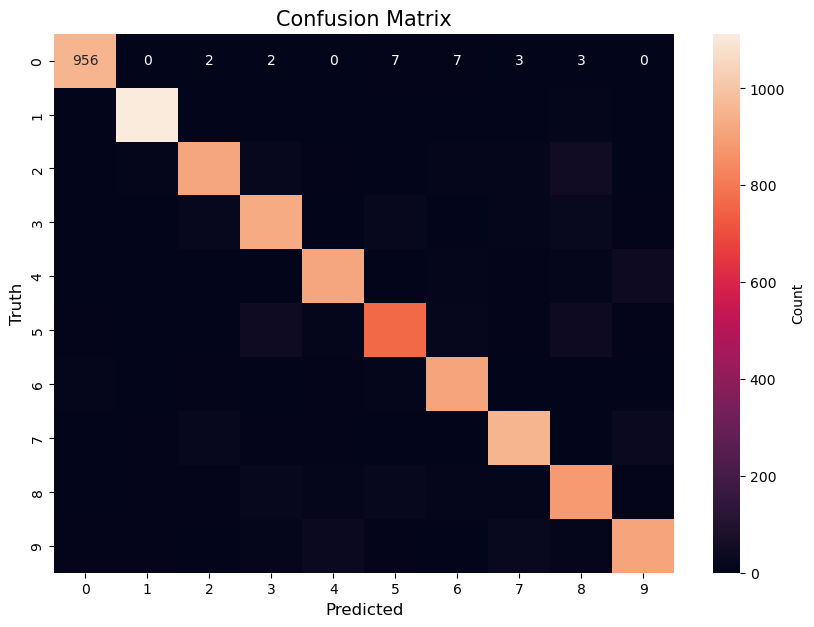

In [52]:
import seaborn as sn


plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d', cbar_kws={'label': 'Count'}, annot_kws={"size": 10})
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Truth', fontsize=12)
plt.title('Confusion Matrix', fontsize=15)

In [54]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 447us/step - accuracy: 0.8725 - loss: 0.4489
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 473us/step - accuracy: 0.9625 - loss: 0.1311
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 446us/step - accuracy: 0.9730 - loss: 0.0880
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 455us/step - accuracy: 0.9800 - loss: 0.0650
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 445us/step - accuracy: 0.9849 - loss: 0.0494


In [56]:
model.evaluate(x_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 248us/step - accuracy: 0.9712 - loss: 0.0950


[0.08037025481462479, 0.9753999710083008]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 261us/step


Text(95.72222222222221, 0.5, 'Truth')

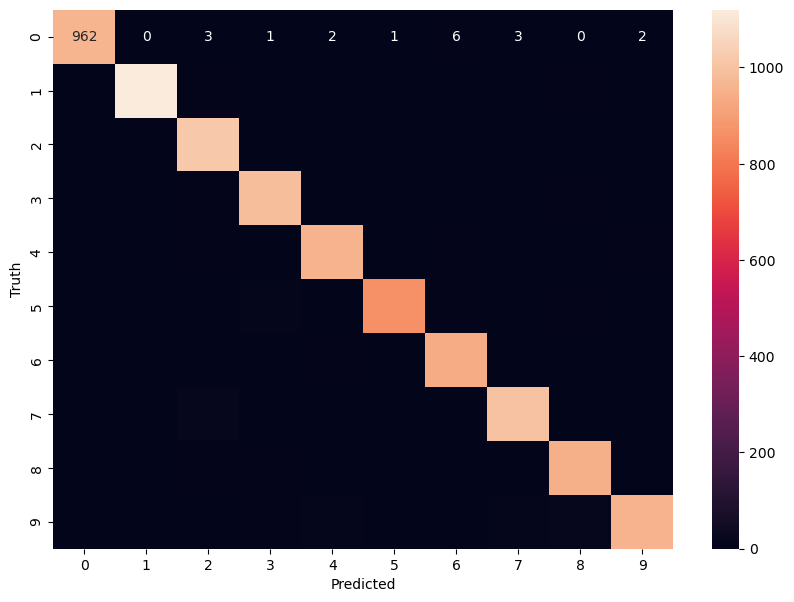

In [60]:
y_predicted = model.predict(x_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Using Flatten layer so that we don't have to call .reshape on input dataset

In [64]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 446us/step - accuracy: 0.8723 - loss: 0.4598
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 464us/step - accuracy: 0.9607 - loss: 0.1333
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 442us/step - accuracy: 0.9735 - loss: 0.0896
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 458us/step - accuracy: 0.9798 - loss: 0.0692
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 452us/step - accuracy: 0.9839 - loss: 0.0526
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 458us/step - accuracy: 0.9884 - loss: 0.0393
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 457us/step - accuracy: 0.9908 - loss: 0.0296
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 469us/step - accuracy: 0.9918 - loss: 0.0257
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 460us/step - accuracy: 0.9935 - loss: 0.0211
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 466us/step - accuracy: 0.9951 - loss: 0.0174


In [68]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step - accuracy: 0.9708 - loss: 0.0967


[0.08579915761947632, 0.9750999808311462]